In [18]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
from matplotlib.gridspec import GridSpec
import cartopy
import cartopy.crs as ccrs
from matplotlib.gridspec import GridSpec
import cmocean.cm as cm
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
import geopandas as gpd
import csv
import re
import os
import sys
user_home_dir = os.path.expanduser('~')
sys.path.insert(0,os.path.join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco
from scipy.spatial import cKDTree
import ess25_icesheet_scripts as ice

In [31]:
# LOAD OLD RUNOFF FILE
ecco_v4_dir = '/efs_ecco/ECCO/V4'
runoff_file_r5 = os.path.join(ecco_v4_dir,'r5','input','input_forcing','other',
              'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin')

FW_r4 = ecco.read_llc_to_tiles(os.path.join(ecco_v4_dir,'r5','input','input_forcing','other'),'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin',nl=12)

load_binary_array: loading file /efs_ecco/ECCO/V4/r5/input/input_forcing/other/runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (12, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (12, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [20]:
# LOAD GRID

#this for LLC90:
ecco_v4_dir = '/efs_ecco/ECCO/V4'
grid_file = os.path.join(ecco_v4_dir,'r4','ECCO_L4_GEOMETRY_LLC0090GRID_V4R4','GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')

#this for LLC1080
#ecco_v4_dir = '/efs_ecco/ifenty/sara/sara'
#grid_file = os.path.join(ecco_v4_dir,'LLC1080_grid_as_13tile_netcdf.nc')

grid = xr.open_dataset(grid_file).load();
grid

<xarray.Dataset> Size: 89MB
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
              k_p1: 51, tile: 13, nb: 4, nv: 2)
Coordinates: (12/20)
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...       ...
    Zp1      (k_p1) float32 204B 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
    Zu       (k_u) float32 200B -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
    Zl       (k_l) float32 200B 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
    XC_bnds  (tile, j, i, nb) float32 2MB -115.0 -115.0 -107.9 ... -115.0 -108.5
    YC_bnds  (tile, j, i, nb) float32 2MB -88.18 -88.32 -88.3 ... -88.18 -88.16
    Z_bnds   (k, nv) float32 400B 0.0 -10.0 -10.0 ... -5.678e+03 -6.134e+03
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    SN       (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    rA       (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    dxG      (tile, j_g, i) float32 421kB 1.558e+04 1.559e+04 ... 2.314e+04
    dyG      (tile, j, i_g) float32 421kB 2.321e+04 2.327e+04 ... 1.558e+04
    Depth    (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...       ...
    hFacC    (k, tile, j, i) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacW    (k, tile, j, i_g) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacS    (k, tile, j_g, i) float32 21MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maskC    (k, tile, j, i) bool 5MB False False False ... False False False
    maskW    (k, tile, j, i_g) bool 5MB False False False ... False False False
    maskS    (k, tile, j_g, i) bool 5MB False False False ... False False False
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

In [4]:
# this for LLC1080
bathy = ecco.read_llc_to_tiles('/home/jovyan/project/','bathy1080_g5_filled_r4',llc=1080)
land1080_mask = np.where(bathy<0,1,0).astype(bool)
land1080_mask.shape
#plt.matshow(land1080_mask[6,:,:])
np.nanmax(land1080_mask[6,:,:])

load_binary_array: loading file /home/jovyan/project/bathy1080_g5_filled_r4
load_binary_array: data array shape  (14040, 1080)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (14040, 1080) 1080
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 1080, 1080)
llc_faces_to_tiles: data_tiles dtype  >f4


np.True_

In [21]:
# LOAD ALTIBERG GRID
path = './data/altiberg/'
filelist = sorted(os.listdir(path))
    
ds = xr.open_dataset(os.path.join(path,filelist[1])).load();
lon=np.array(ds.longitude[:,:])
lat=np.array(ds.latitude[:,:])

In [22]:
# LOAD LANDMASK AND INTERPOLATE TO ALTIBERG GRID
# consider using ecco mask instead of this mask I quickly created in qgis
land_ds = xr.open_dataset('./data/landmask_arctic.nc').load();
land_lon, land_lat=np.meshgrid(land_ds.lon,land_ds.lat)
landds=np.array(land_ds.Band1)
land=scipy.interpolate.griddata((land_lon.flatten(),land_lat.flatten()), landds.ravel(), (lon, lat), method='linear')
land=np.where(~np.isnan(land),1,0)

In [7]:
def astropy_convolve_field(pre_smoothed_field, kernel, num_iterations, mask):
#    http://docs.astropy.org/en/stable/api/astropy.convolution.convolve.html?highlight=convolve
#
#    mask : None or numpy.ndarray
#    A “mask” array. Shape must match array, and anything that is masked 
#    (i.e., not 0/False) will be set to NaN for the convolution. 
#    If None, no masking will be performed unless array is a masked array. 
#    If mask is not None and array is a masked array, a pixel is masked of 
#    i is masked in either mask or array.mask.
    
    ## TRANSLATION : SMOOTH INTO locations WHERE MASK IS 0, 
    ##               EVERYTHING NOT ZERO IS TURNED TO NAN
    astropy_conv = np.copy(pre_smoothed_field)

    for ii in range(num_iterations):    
        astropy_conv = convolve(astropy_conv, kernel, mask=mask, 
                                preserve_nan=True)
        
    return astropy_conv

In [23]:
# EXTRACT DATA FROM CSV FILES OF INDIVIDUAL GLACIERS
# monthly over the period 2010 to 2020

# glacier location
gdf = gpd.read_file('./data/00_GlacierGates.gpkg')
points = gdf['geometry']
names = gdf['gate']
names=np.array(names)
# Iterate through the points and names
for index, point in points.items():
    name = names[index]
    #print(f"Point {index}: {name}, Coordinates: {point.x}, {point.y}")

path = './data/dataverse_files'
filelist = sorted(os.listdir(path))
print(filelist[0])
filelist = filelist[1::] # skip first file, .ipynb_checkpoints
print(len(filelist))

# 132 because 11 years with 12 months, 11*12=132
info = np.zeros((3,len(filelist))) # info contains gatenumber, lon, lat for each glacier
runoff = np.zeros((132,len(filelist)))
icedischarge = np.zeros((132,len(filelist)))
basalmelt = np.zeros((132,len(filelist)))
totalvolumeloss = np.zeros((132,len(filelist)))

for i in range(0,len(filelist)):
    with open(os.path.join(path,filelist[i]), 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
    for line in header:
        if 'Mankoff discharge gate' in line:
            match = re.search(r':\s*(\d+)', line)
            if match:
                gate_number = int(match.group(1))
                idx = np.argwhere(names==gate_number)
                loncsv=np.array(points[idx[0]].x)
                latcsv=np.array(points[idx[0]].y)
                info[0,i]=gate_number
                info[1,i]=loncsv[0]
                info[2,i]=latcsv[0]
                break
    x=np.genfromtxt(os.path.join(path,filelist[i]), delimiter=',')
    runoff[:,i] = x[1::,1]
    icedischarge[:,i] = x[1::,2]
    basalmelt[:,i] = x[1::,3]
    totalvolumeloss[:,i] = x[1::,4]

.ipynb_checkpoints
267


In [24]:
# LOAD ALTIBERG DATA
path = './data/altiberg/'
filelist = sorted(os.listdir(path))
#for i, d in enumerate(filelist):
    #print(str(i).zfill(3),d)
    
ds = xr.open_dataset(os.path.join(path,filelist[24])).load();
ds=ds.fillna(0)
lon=np.array(ds.longitude[:,:])
lat=np.array(ds.latitude[:,:])

# use data from 2010-2020. 11 years, same as GEUS
files=[os.path.join(path,filelist[x]) for x in range(18,29)]
ds=xr.open_mfdataset(files,concat_dim='time',combine='nested')
ds=ds.fillna(0)
month_ds= ds.fresh_water_flux.groupby("time.month")

In [45]:
tiles = [2,6,10]

# Initialize to zero
FW = np.zeros(np.shape(FW_r4)) # this for LLC90
#FW = np.zeros([12,1,13,1080,1080]) # this for LLC1080

smalliceberg_contribution = 22796504004.83334 # m^3/month
# I get this number by subtracting the ALTIBERG freshwater flux (total annual) from the 
# solid discharge given by GEUS (total annual). Small icebergs discharge/month is constant
# over the year, but spatial distribution varies according to GEUS solid discharge distribution

# turn individual contributions on/off
use_runoff = 1 # GEUS runoff
use_basal = 1 # GEUS basal melt
use_large_solid = 1 # ALTIBERG
use_small_solid = 1 # GEUS solid minus altiberg

runoff_plot = np.zeros((12))
largesolid_plot = np.zeros((12))
smallsolid_plot = np.zeros((12))
basal_plot = np.zeros((12))

llcarea = grid.rA # this for LLC90
#llcarea = grid.RAC # this for LLC1080

alti_area=2.7778e+06*1000 # area of a grid cell in altiberg grid (m^2). From netcdf metadata

for m in range(0,12): # loop over months (0=jan, 11=dec)
    # initialize the grids (altiberg 50x50 km grid)
    FW_grid = np.zeros([4,281,281])
    runoff_grid = np.zeros(np.shape(lon))
    icedischarge_grid = np.zeros(np.shape(lon))
    basalmelt_grid = np.zeros(np.shape(lon))
    
    m_idx = np.linspace(m,10*12+m,11).astype(np.uint8) #index of specific month (same month in all 11 year)

    # EXTRACT DATA FROM GEUS
    for i in range(0,np.size(info,1)): # loop over individual glacier gates
        # interpolate to altiberg grid
        # Compute the squared distance from the point to each grid point
        dist_sq = (np.array(lon)-info[1,i])**2 + (np.array(lat)-info[2,i])**2
        # Find the index of the minimum distance
        idx_flat = np.argmin(dist_sq)
        idx_x, idx_y = np.unravel_index(idx_flat, lon.shape)

        # calculate 10 year mean in each month
        runoff_month = np.nanmean(runoff[m_idx,i],axis=0)
        icedischarge_month = np.nanmean(icedischarge[m_idx,i],axis=0)
        basalmelt_month = np.nanmean(basalmelt[m_idx,i],axis=0)

        # interpolate point data to altiberg grid
        if ~np.isnan(runoff_month):
            runoff_grid[idx_x,idx_y] = runoff_grid[idx_x,idx_y]+runoff_month
        if ~np.isnan(icedischarge_month):
            icedischarge_grid[idx_x,idx_y] = icedischarge_grid[idx_x,idx_y]+icedischarge_month
        if ~np.isnan(basalmelt_month):
            basalmelt_grid[idx_x,idx_y] = basalmelt_grid[idx_x,idx_y]+basalmelt_month

    if use_runoff == 1:
        FW_grid[0,:,:] = runoff_grid
        runoff_plot[m] = np.nansum(runoff_grid)
    if use_basal == 1:
        FW_grid[1,:,:] = basalmelt_grid
        basal_plot[m] = np.nansum(basalmelt_grid)
    if use_large_solid == 1:
        # /11 to compute yearly average (11 years)
        # *0.001 to convert from mm/month to m/month. 
        # *(-1) to change signs. 
        # *area to convert from m/month to m^3/month
        altibergmonthmean = month_ds[m+1].sum(dim='time')/11*0.001*(-1)*alti_area
        FW_grid[2,:,:] = altibergmonthmean
        largesolid_plot[m] = np.nansum(altibergmonthmean)
    if use_small_solid == 1:
        # place small icebergs at glacier gates according to solid flux.
        # smalliceberg_contribution is chosen so total solid add up to GEUS annual mean
        small_solid_grid = icedischarge_grid * (smalliceberg_contribution)/(np.nansum(icedischarge_grid))
        FW_grid[3,:,:] = small_solid_grid
        smallsolid_plot[m] = np.nansum(small_solid_grid)

    # APPLY SMOOTHING (on altiberg grid)
    # Set up the Gaussian 2D kernel
    stddev=1
    k=stddev*3
    kernel = Gaussian2DKernel(x_stddev=stddev,y_stddev=stddev, x_size=k, y_size=k)
    num_iterations = 10
    mask = land # this is not llc landmask

    for j in range(0,4):
        if np.any(FW_grid[j,:,:])==False:
            continue
        pre_smooth_field = np.where(np.isnan(FW_grid[j,:,:]),0,FW_grid[j,:,:])
        pre_smooth_field_sum = np.nansum(pre_smooth_field)
        post_smooth_field = astropy_convolve_field(pre_smooth_field, kernel, num_iterations, mask)
        post_smooth_field_sum = np.nansum(post_smooth_field)
        post_smooth_field = post_smooth_field * pre_smooth_field_sum/ post_smooth_field_sum
    
        sumbefore=np.nansum(post_smooth_field) #sum in m^3/month
        post_smooth_field=post_smooth_field/alti_area #interpolate in m/month
        
        print('sum in month ',m,' before regridding: ',sumbefore)
        sumafter=0
        test=0
        
        for i in tiles:
            # The fields are interpolated from the Altiberg grid to LLC90 using scipy.interpolate.griddata(), one tile at at time
            # It does not conserve the total flux (see by uncommenting: result[landllc] = result[landllc] * (np.nansum(post_smooth_field[idx])*alti_area)/(sumafter0))
            # You would probably want to use something else than this for higher resolution LLC grids
            # uses a lot of memory, but can be run with 64GB
            # idealy, do this not tile by tile
            
            lonllc=np.array(grid.XC[i,:,:])
            latllc=np.array(grid.YC[i,:,:])
            landllc=np.array(grid.maskC[0,i,:,:]) # this for LLC90
            #landllc=np.array(land1080_mask[i,:,:]) # this for LLC1080
            
            # find the points in altiberg grid that are inside tile
            tree = cKDTree(np.vstack((lonllc.ravel(), latllc.ravel())).T)
            distances, _ = tree.query(np.vstack((lon.flatten(), lat.flatten())).T)
            # Define a maximum distance (in the same units as lon/lat)
            max_distance = 0.55# this has to be adjusted according to the grid size... (eg. 0.55 for LLC90 and 0.05 for LLC1080)
            distances=np.reshape(distances,np.shape(lon))
            idx = np.where(distances<max_distance)
            # a simpler way:
            #idx=np.where((lon>np.min(lonllc))&(lon<np.max(lonllc))&(lat>np.min(latllc))&(lat<np.max(latllc)))
            
            # Flatten grid and mask
            grid_points = np.vstack((lonllc.ravel(), latllc.ravel())).T
            masked_points = grid_points[landllc.ravel()]
            # Interpolate only at valid (masked) points
            interpolated = scipy.interpolate.griddata(np.vstack((lon[idx].flatten(), lat[idx].flatten())).T, post_smooth_field[idx].ravel(), masked_points, method='linear')
            # Create full grid and fill only masked regions
            result = np.full(lonllc.shape, np.nan)
            result[landllc] = interpolated # result in m/month
            
            sumafter0 = np.nansum(result*llcarea[i,:,:]) # sum in m^3/month
            test=test+np.nansum(post_smooth_field[idx]*alti_area) # sum in m^3/month
            # Interpolation is not perfect at conserving total flux so we apply a correction
            result[landllc] = result[landllc] * (np.nansum(post_smooth_field[idx])*alti_area)/(sumafter0)
            sumafter = sumafter+np.nansum(result*llcarea[i,:,:]) #sum in m^3/month
            
            result = result/2629743.83 # convert from m/month to m/s
            FW[m][0][i][:,:]=FW[m][0][i][:,:]+result
        print('sum in month ',m,' after regridding:  ',test)    
        print('sum in month ',m,' after regridding:  ',sumafter)


sum in month  0  before regridding:  9134928.999999998
sum in month  0  after regridding:   9228255.241032299
sum in month  0  after regridding:   9228255.241032299
sum in month  0  before regridding:  1223527291.0909092
sum in month  0  after regridding:   1240613402.196761
sum in month  0  after regridding:   1240613402.1967611
sum in month  0  before regridding:  7060646684.356518
sum in month  0  after regridding:   6982018361.133661
sum in month  0  after regridding:   6982018361.133661
sum in month  0  before regridding:  22796504004.833336
sum in month  0  after regridding:   23121651273.69723
sum in month  0  after regridding:   23121651273.69723
sum in month  1  before regridding:  9884017.0
sum in month  1  after regridding:   9982049.994495608
sum in month  1  after regridding:   9982049.994495608
sum in month  1  before regridding:  1223568071.2727273
sum in month  1  after regridding:   1240656166.6370537
sum in month  1  after regridding:   1240656166.637054
sum in month 

In [49]:
# SAVE FW AS BINARY
print(np.shape(FW))
FW_compact = ecco.llc_tiles_to_compact(FW)

with open('./binary/FW_Greenland', 'wb') as f:
    FW_compact.astype('>f4').tofile(f)


(12, 1, 13, 90, 90)
llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (12, 1, 90, 90)
llc_faces_to_compact: data_compact array shape (12, 1, 1170, 90)
llc_faces_to_compact: data_compact array dtype float64


In [50]:
# COMBINE NEW FW FROM GREENLAND WITH FW FROM REST OF THE WORLD FROM OLD FW FILE
FW_new = ecco.load_binary_array('./binary','FW_Greenland',ni=90,nj=1170,nl=12)
print(np.shape(FW_new))

FW_old = ecco.load_binary_array(os.path.join(ecco_v4_dir,'r5','input','input_forcing','other'),'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin',ni=90,nj=1170,nl=12)
print(np.shape(FW_old))

# this is not the best way to do it, but good enough for now:
FW_new2 = np.where((FW_new<0.01e-07)&(FW_old>0.01e-07),(FW_old+FW_new)/2,FW_new)
FW_new2 = np.where((FW_new<0.003e-07)&(FW_old>0.003e-07),FW_old,FW_new2)
print(np.shape(FW_new2))

FW_new2 = np.where(np.isnan(FW_new2),0,FW_new2) # get rid of nan values
with open('./binary/FW_sara', 'wb') as f:
    FW_new2.astype('>f4').tofile(f)

load_binary_array: loading file binary/FW_Greenland
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
(12, 1, 1170, 90)
load_binary_array: loading file /efs_ecco/ECCO/V4/r5/input/input_forcing/other/runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
(12, 1, 1170, 90)
(12, 1, 1170, 90)


In [51]:
#check that the FW in binary file is equal to totalvolumeloss calculated above
LLCarea=np.array(grid.rA)
LLCarea=ecco.llc_tiles_to_compact(LLCarea)
LLCarea=np.reshape(LLCarea,[1,1170,90])
LLCarea=np.repeat(LLCarea,12,axis=0)
FW_new_x = np.where(FW_new>0.003e-07,FW_new,np.nan)
totalvolumeloss_newFW = FW_new_x[:,0,:,:]*LLCarea
print(np.shape(totalvolumeloss_newFW))
totalvolumeloss_newFW = np.nansum(totalvolumeloss_newFW,axis=(0))*2629743.83
print(np.shape(totalvolumeloss_newFW))
totalvolumeloss_newFW = ecco.llc_compact_to_tiles(totalvolumeloss_newFW)
print(np.shape(totalvolumeloss_newFW))
#totalvolumeloss_newFW = np.nansum(totalvolumeloss_newFW,axis=(1,2))*2629743.83
FW_old_x = np.where(FW_new>0.003e-07,FW_old,np.nan)
totalvolumeloss_oldFW = FW_old_x[:,0,:,:]*LLCarea
totalvolumeloss_oldFW = np.nansum(totalvolumeloss_oldFW,axis=(0))*2629743.83
totalvolumeloss_oldFW = ecco.llc_compact_to_tiles(totalvolumeloss_oldFW)

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (90, 90)
llc_faces_to_compact: data_compact array shape (1170, 90)
llc_faces_to_compact: data_compact array dtype float32
(12, 1170, 90)
(1170, 90)
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  float32
(13, 90, 90)
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  float32


Text(0.5, 1.0, 'NEW')

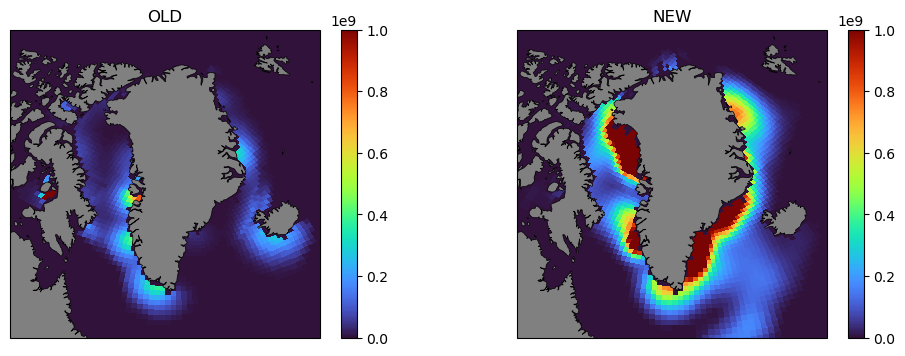

In [52]:
fig = plt.figure(figsize=(12,4))
gs = GridSpec(1,2)
vmin=0
vmax=1e+9

ax = fig.add_subplot(gs[0,0], projection = ccrs.Orthographic(
        central_longitude=-45,
        central_latitude=45))
for tile in tile_list:
        sc=plt.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                       totalvolumeloss_oldFW[tile][:,:],
                       transform=ccrs.PlateCarree(),
                       vmin=0, vmax=vmax, cmap='turbo')
ax.set_facecolor('0.9')
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='0.5', linewidth=0.5)
ax.set_extent([-70, -20, 53, 88], crs=ccrs.PlateCarree())
cb=plt.colorbar(sc)
ax.set_title('OLD')

ax = fig.add_subplot(gs[0,1], projection = ccrs.Orthographic(
        central_longitude=-45,
        central_latitude=45))
for tile in tile_list:
        #y_tile=np.sum(runoff_tiles[tile][month-1,:,:])
        #y[month]=y[month]+y_tile
        sc=plt.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                       totalvolumeloss_newFW[tile][:,:],
                       transform=ccrs.PlateCarree(),
                       vmin=0, vmax=vmax, cmap='turbo')
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='0.5', linewidth=0.5)
ax.set_facecolor('0.9')
ax.set_extent([-70, -20, 53, 88], crs=ccrs.PlateCarree())
cb=plt.colorbar(sc)
ax.set_title('NEW')

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (90, 90)
llc_faces_to_compact: data_compact array shape (1170, 90)
llc_faces_to_compact: data_compact array dtype float32


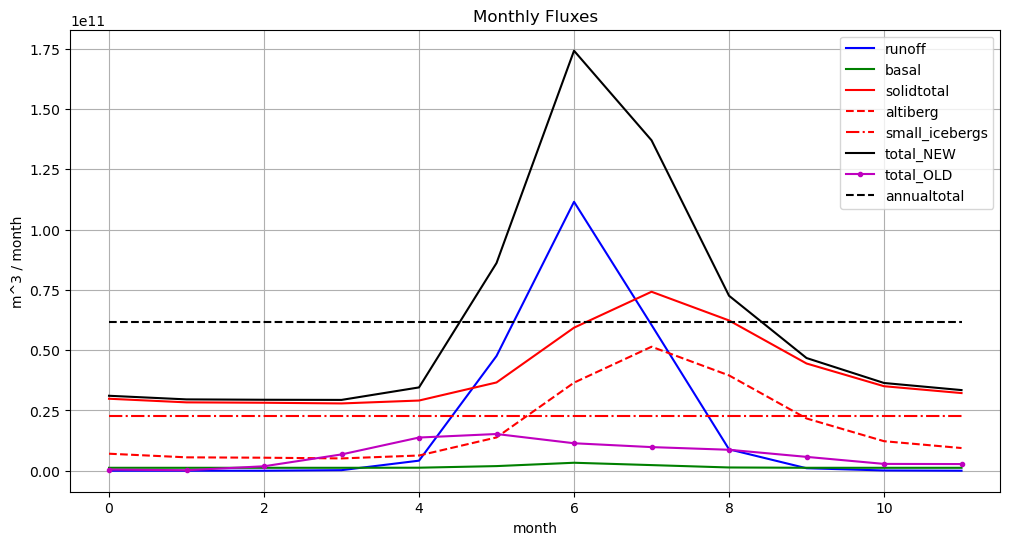

In [53]:
month_plot=np.linspace(0,11,12)
totalvolumeloss_plot = runoff_plot+basal_plot+largesolid_plot+smallsolid_plot

#check that the FW in binary file is equal to totalvolumeloss calculated above
LLCarea=np.array(grid.rA)
LLCarea=ecco.llc_tiles_to_compact(LLCarea)
LLCarea=np.reshape(LLCarea,[1,1170,90])
LLCarea=np.repeat(LLCarea,12,axis=0)
FW_new_x = np.where(FW_new>0.003e-07,FW_new,np.nan)
totalvolumeloss_newFW = FW_new_x[:,0,:,:]*LLCarea
totalvolumeloss_newFW = np.nansum(totalvolumeloss_newFW,axis=(1,2))*2629743.83
FW_old_x = np.where(FW_new>0.003e-07,FW_old,np.nan)
totalvolumeloss_oldFW = FW_old_x[:,0,:,:]*LLCarea
totalvolumeloss_oldFW = np.nansum(totalvolumeloss_oldFW,axis=(1,2))*2629743.83

fig = plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,1,1)
ax.plot(month_plot,runoff_plot,'-b')
ax.plot(month_plot,basal_plot,'-g')
ax.plot(month_plot,largesolid_plot+smallsolid_plot,'-r')
ax.plot(month_plot,largesolid_plot,'--r')
ax.plot(month_plot,smallsolid_plot,'-.r')
ax.plot(month_plot,totalvolumeloss_plot,'-k')
#ax.plot(month_plot,totalvolumeloss_newFW,'.-k')
ax.plot(month_plot,totalvolumeloss_oldFW,'.-m')
ax.plot(month_plot,np.ones(np.shape(runoff_plot))*740.5e+09/12,'--k')
ax.set_xlim([-0.5,11.5])
ax.set_xlabel('month')
ax.set_ylabel('m^3 / month')
ax.legend(['runoff','basal','solidtotal','altiberg','small_icebergs','total_NEW','total_OLD','annualtotal'])
ax.set_title('Monthly Fluxes')
ax.grid()

In [54]:
print('New field annual flux [m^3/year]: ',np.nansum(totalvolumeloss_newFW))
print('Old field annual flux [m^3/year]: ',np.nansum(totalvolumeloss_oldFW))
np.nansum(totalvolumeloss_newFW)/np.nansum(totalvolumeloss_oldFW)

New field annual flux [m^3/year]:  735485400000.0
Old field annual flux [m^3/year]:  79586170000.0


np.float32(9.241372)

In [55]:
# check that the total annual add up to the number in GEUS paper
print('GEUS mean monthly [m^3/month]:       ',740.5e+09/12)
print('Calculated mean monthly [m^3/month]: ',np.nanmean(totalvolumeloss_plot))

GEUS mean monthly [m^3/month]:        61708333333.333336
Calculated mean monthly [m^3/month]:  61711117374.87879


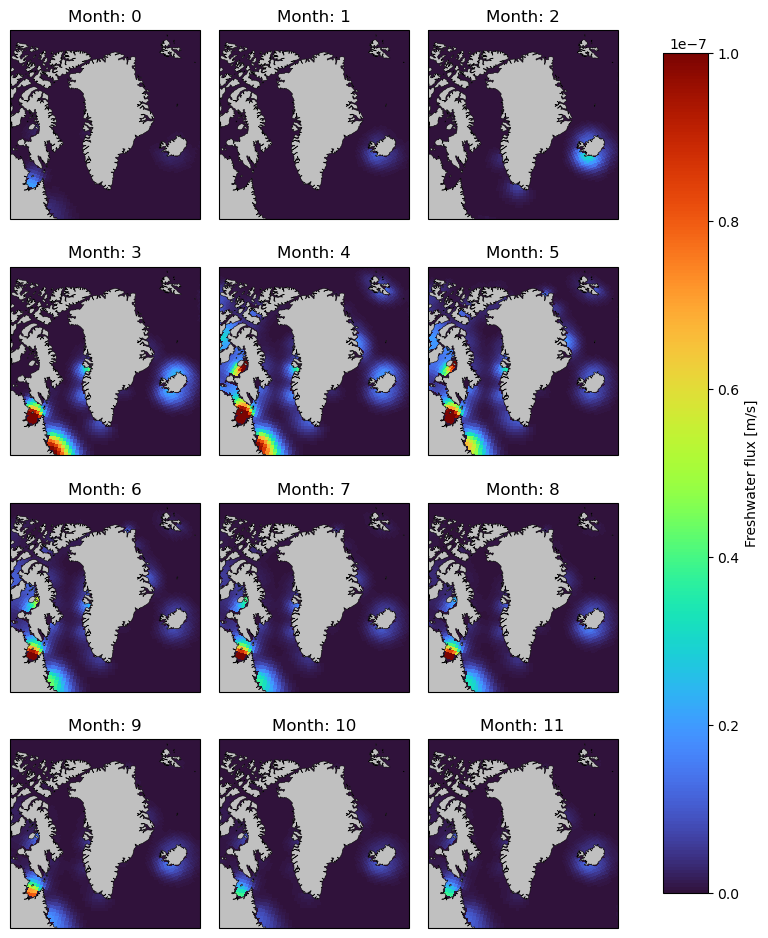

In [56]:
# PLOT OLD FW FIELD

# load ECCO v4r5 inout file
runoff_file_r5 = os.path.join(ecco_v4_dir,'r5','input','input_forcing','other',
              'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin')
runoff_r5 = ice.read_ecco_runoff_file(runoff_file_r5)

# define some monthly metadata
tile_list = [2,6,10] # fill me in! (note to matlab and fortran people:
                     #              we're python counting here...)

# estimate the min and max (units: m/s)
vmin = 0
vmax = 1e-7


#x=np.linspace(1,12,12)
#y=np.ones(np.shape(x))

# define the figure object
fig = plt.figure(figsize=(9,12))
gs = GridSpec(4,3)

# loop through each month and make a plot of the runoff fields
for month in range(12):
    ax = fig.add_subplot(gs[month//3, month%3], projection = ccrs.Orthographic(
        central_longitude=-45,
        central_latitude=45
        ))
    ax.set_title('Month: '+str(month))
    for tile in tile_list:
        sc=plt.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                       runoff_r5[tile][month,:,:],
                       transform=ccrs.PlateCarree(),
                       vmin=0, vmax=vmax, cmap='turbo')
    ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver', linewidth=0.4)
    ax.set_extent([-70, -20, 53, 88], crs=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb=fig.colorbar(sc, cax=cbar_ax)
cb.set_label('Freshwater flux [m/s]')


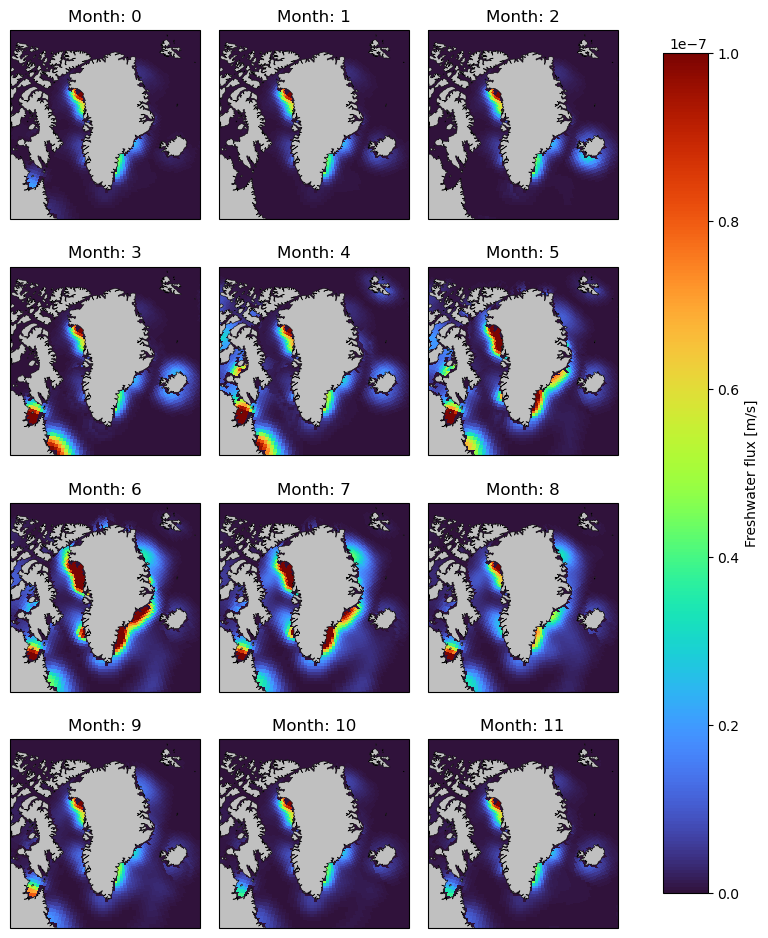

In [57]:
# PLOT NEW FW FIELD
binfile = ice.read_ecco_runoff_file('./binary/FW_sara',)
#binfile = ecco.load_binary_array('./binary','FW_Greenland_1080',ni=1080,nj=14040,nl=12)
#binfile = ecco.llc_compact_to_tiles(binfile)
#binfile = binfile[:,0,:,:,:]
#print(binfile.shape)

# define some monthly metadata
tile_list = [2,6,10] # fill me in! (note to matlab and fortran people:
                     #              we're python counting here...)

# estimate the min and max (units: m/s)
vmin = 0
vmax = 1e-7


#x=np.linspace(1,12,12)
#y=np.ones(np.shape(x))

# define the figure object
fig = plt.figure(figsize=(9,12))
gs = GridSpec(4,3)

# loop through each month and make a plot of the runoff fields
for month in range(12):
    ax = fig.add_subplot(gs[month//3, month%3], projection = ccrs.Orthographic(
        central_longitude=-45,
        central_latitude=45
        ))
    ax.set_title('Month: '+str(month))
    for tile in tile_list:
        sc=plt.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                       binfile[tile][month,:,:],
                       transform=ccrs.PlateCarree(),
                       vmin=0, vmax=vmax, cmap='turbo')
    ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver', linewidth=0.4)
    ax.set_extent([-70, -20, 53, 88], crs=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1, hspace=0.1)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb=fig.colorbar(sc, cax=cbar_ax)
cb.set_label('Freshwater flux [m/s]')